In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import random
from sklearn.cluster import KMeans

In [160]:
data = pd.read_csv('data/Cleaned/Cleaned_channelData.csv')
data.head()

,Unnamed: 0,channel_name,Subscribers,Viewers,Videos_made,channel_description,start_year,start_month,start_day,start_time,start_hour,start_minute,start_second
0,0,Zee TV,72500000,7.649366e+10,134822,"Launched in 1992, ZEE TV is the pioneer of tel...",2005,12,11,06:23:26,6,23,26
1,1,T-Series,249000000,2.328870e+11,19492,"""Music can change the world"". T-Series is Indi...",2006,3,13,14:27:05,14,27,5
2,2,Cocomelon - Nursery Rhymes,165000000,1.682480e+11,1005,"At CoComelon, our primary goal has always been...",2006,9,1,22:18:49,22,18,49
3,3,SET India,162000000,1.517180e+11,118804,Sony Entertainment Television is one of the le...,2006,9,20,22:24:59,22,24,59
4,4,WWE,97100000,7.877977e+10,71268,WWE on YouTube is your number one spot to catc...,2007,5,11,01:20:02,1,20,2


In [161]:
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.columns

Index(['channel_name', 'Subscribers', 'Viewers', 'Videos_made',
       'channel_description', 'start_year', 'start_month', 'start_day',
       'start_time', 'start_hour', 'start_minute', 'start_second'],
      dtype='object')

In [162]:
cols = ['Subscribers', 'Viewers', 'Videos_made']

In [163]:
data.isna().sum()

channel_name             0
Subscribers              0
Viewers                  0
Videos_made              0
channel_description    372
start_year               0
start_month              0
start_day                0
start_time               0
start_hour               0
start_minute             0
start_second             0
dtype: int64

In [164]:
data.columns

Index(['channel_name', 'Subscribers', 'Viewers', 'Videos_made',
       'channel_description', 'start_year', 'start_month', 'start_day',
       'start_time', 'start_hour', 'start_minute', 'start_second'],
      dtype='object')

In [181]:
cols = ['Subscribers', 'Viewers', 'Videos_made']

In [182]:
random.seed(100)

df = data[cols]
df.head()

,Subscribers,Viewers,Videos_made
0,72500000,7.649366e+10,134822
1,249000000,2.328870e+11,19492
2,165000000,1.682480e+11,1005
3,162000000,1.517180e+11,118804
4,97100000,7.877977e+10,71268


In [183]:
# Scaling data

scaler = StandardScaler()
ss_data = scaler.fit_transform(df)

# Create a new DataFrame from the standardized data
ss_df = pd.DataFrame(data=ss_data, columns=df.columns)
ss_df.head()

,Subscribers,Viewers,Videos_made
0,5.443431,7.917503,3.515320
1,20.148462,24.968673,0.300148
2,13.150034,17.921246,-0.215233
3,12.900090,16.119022,3.068769
4,7.492971,8.166752,1.743560


In [184]:
min_vals = df.min()
max_vals = df.max()

# Normalize the data
n_df = (df - min_vals) / (max_vals - min_vals)
n_df.head()

,Subscribers,Viewers,Videos_made
0,0.291165,0.328458,0.191187
1,1.000000,1.000000,0.027641
2,0.662651,0.722445,0.001425
3,0.650602,0.651466,0.168472
4,0.389960,0.338275,0.101063


### K means CLUSTERING - Data

In [185]:
kmeans = KMeans(n_clusters=2).fit(df)
centroids = kmeans.cluster_centers_

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [186]:
print(centroids)

[[6.77980787e+06 3.49841308e+09 8.65339597e+03]
 [1.34915385e+08 1.28820496e+11 3.27048462e+04]]


In [187]:
centroids[:, 0], centroids[:, 1]

(array([6.77980787e+06, 1.34915385e+08]),
 array([3.49841308e+09, 1.28820496e+11]))

C:\Users\Sid\AppData\Local\Temp\ipykernel_21580\4259533695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_


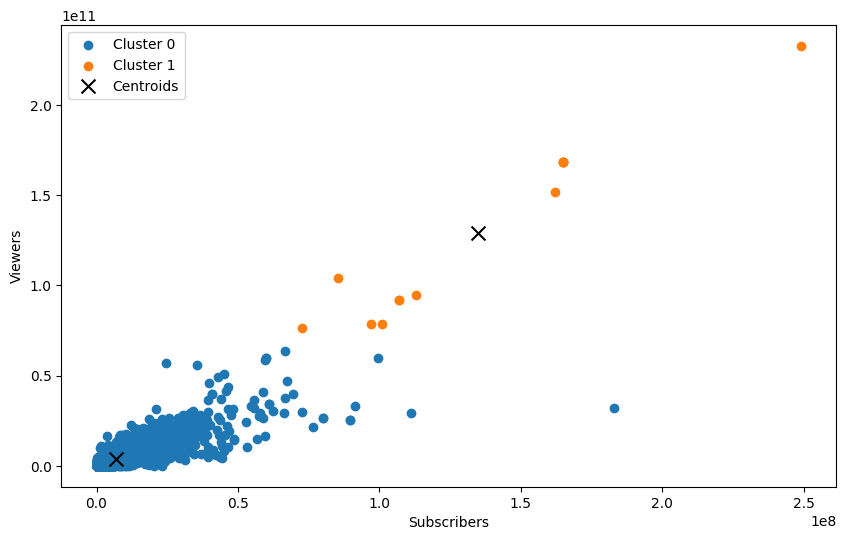

In [188]:
# Add a 'Cluster' column to your DataFrame to indicate cluster membership
df['Cluster'] = kmeans.labels_

# Create a scatter plot to visualize the data points and centroids
plt.figure(figsize=(10, 6))

# Scatter plot for each cluster
for cluster in range(2):
    plt.scatter(df[df['Cluster'] == cluster][cols[0]],
                df[df['Cluster'] == cluster][cols[1]],
                label=f'Cluster {cluster}')

# Plot cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, color='black', label='Centroids')

# Label axes
plt.xlabel(cols[0])
plt.ylabel(cols[1])

# Add a legend
plt.legend()

# Show the plot
plt.show()

C:\Users\Sid\AppData\Local\Temp\ipykernel_21580\2072132018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_


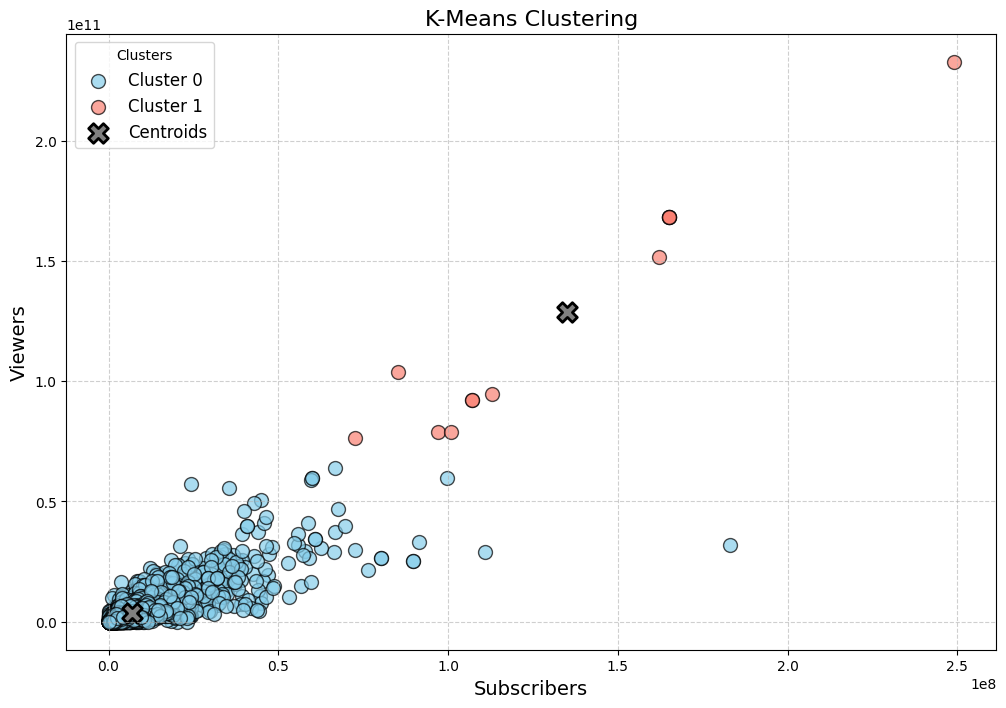

In [189]:
df['Cluster'] = kmeans.labels_

# Create a prettier scatter plot to visualize the data points and centroids
plt.figure(figsize=(12, 8))

# Define custom colors for each cluster
colors = ['skyblue', 'salmon', 'lightgreen']

# Scatter plot for each cluster
for cluster in range(2):
    plt.scatter(df[df['Cluster'] == cluster][cols[0]],
                df[df['Cluster'] == cluster][cols[1]],
                label=f'Cluster {cluster}',
                color=colors[cluster],
                alpha=0.7,
                edgecolors='k',  # Add black edges for data points
                s=100)  # Adjust point size

# Plot cluster centroids with larger markers
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='X', s=200, color='gray',
            label='Centroids', edgecolors='k', linewidths=2)

# Label axes
plt.xlabel(cols[0], fontsize=14)
plt.ylabel(cols[1], fontsize=14)

# Add a legend with a fancy box
plt.legend(loc='upper left', fontsize=12, frameon=True, title='Clusters')

# Add a title
plt.title('K-Means Clustering', fontsize=16)

# Customize gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

### ELBOW METHOD

In [190]:
from sklearn.preprocessing import StandardScaler
scaled_df = StandardScaler().fit_transform(df)

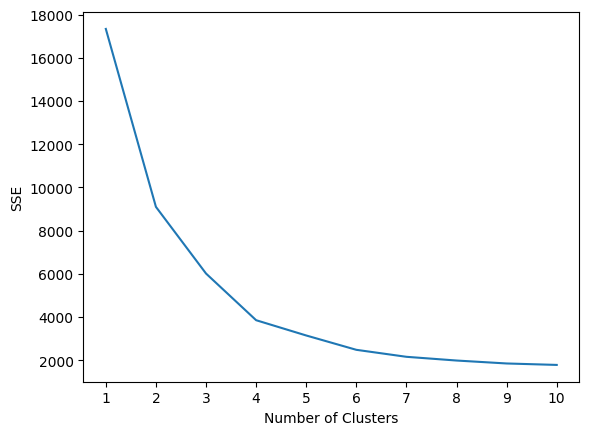

In [191]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

**BRO DO A BEFORE AND AFTER OUTLIER**

### SILHOUETTE METHOD

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

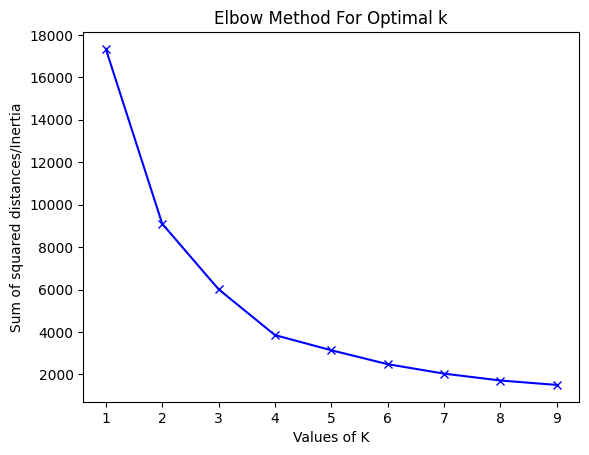

In [192]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(scaled_df)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [193]:
silhouette_avg = []

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

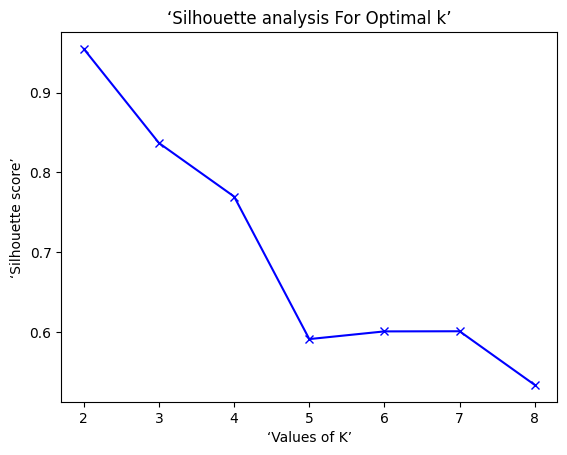

In [194]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(scaled_df)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(scaled_df, cluster_labels))


plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('‘Values of K’')
plt.ylabel('‘Silhouette score’')
plt.title('‘Silhouette analysis For Optimal k’')
plt.show()

From the above output, the optimal number of K is 2

## CLUSTERING - Scaled data

In [195]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(n_df)
centroids = kmeans.cluster_centers_

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


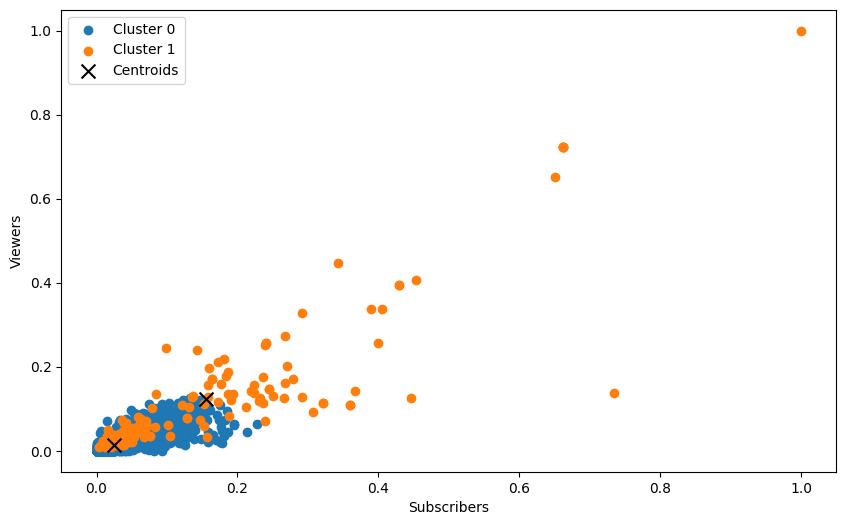

In [201]:
# Add a 'Cluster' column to your DataFrame to indicate cluster membership
n_df['Cluster'] = kmeans.labels_

# Create a scatter plot to visualize the data points and centroids
plt.figure(figsize=(10, 6))

# Scatter plot for each cluster
for cluster in range(2):
    plt.scatter(n_df[n_df['Cluster'] == cluster][cols[0]],
                n_df[n_df['Cluster'] == cluster][cols[1]],
                label=f'Cluster {cluster}')

# Plot cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, color='black', label='Centroids')

# Label axes
plt.xlabel(cols[0])
plt.ylabel(cols[1])

# Add a legend
plt.legend()

# Show the plot
plt.show()